In [1]:
import torch
import model
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from pathlib import Path
import os 
from matplotlib import pyplot as plt
import pandas as pd
import yaml
import sys
import pickle
sys.path.append('./../..')
sys.path.append('./..')

try:
    %load_ext autoreload
    %autoreload 2
except:
    pass

DIR = 'us_import1'

In [2]:
def get_domain_dims(DIR):
    with open('./../../generated_data_v1/{}/domain_dims.pkl'.format(DIR), 'rb')  as fh:
        domain_dims = pickle.load(fh)
    return domain_dims

In [3]:
def get_training_data(DIR):
    x_pos = np.load('./../../generated_data_v1/{}/stage_2/train_x_pos.npy'.format(DIR))
    x_neg = np.load('./../../generated_data_v1/{}/stage_2/train_x_neg.npy'.format(DIR))
    return x_pos, x_neg

In [ ]:
# saved_model = None

# if saved_model is None:
#     model.train_model(x_pos,x_neg, batch_size=128, epochs=50)
#     model.save_model('saved_model/{}'.format(DIR))
# else:
#     saved_model_path = os.path.join('./saved_model/{}/{}'.format(DIR, saved_model))
#     model.load_model(saved_model_path)


In [52]:
ID_COL = 'PanjivaRecordID'
RESULTS_OP_PATH = 'APE_output'
RESULTS_OP_PATH = os.path.join(RESULTS_OP_PATH,DIR)
results_path = Path(RESULTS_OP_PATH)
results_path.mkdir(parents=True,exist_ok=True)

x_pos, x_neg = get_training_data(DIR)
x_neg = x_neg.reshape([x_pos.shape[0], -1 , x_pos.shape[1]])
domain_dims = get_domain_dims(DIR)
total_entity_count = sum(domain_dims.values())

In [63]:
model_obj = model.APE( emb_dim, domain_dims)
container = model.APE_container(model_obj, device, batch_size= 128,  LR = 0.001)

In [54]:
# if saved_model is None:
#     model.train_model(x_pos,x_neg, batch_size=128, epochs=50)
#     model.save_model('saved_model/{}'.format(DIR))
# else:
#     saved_model_path = os.path.join('./saved_model/{}/{}'.format(DIR, saved_model))
#     model.load_model(saved_model_path)

container.model_obj.mode='train'
test_df = pd.read_csv(
    './../../generated_data_v1/{}/stage_2/test_serialized.csv'.format(DIR),
    index_col=None
)

In [65]:
loss = container.train_model(
    x_pos, 
    x_neg, 
    num_epochs=3,
    tol = 0.1
)

 19%|█▉        | 100/518 [00:07<00:32, 13.01it/s, Batch =102]

Epoch 0 Batch 100 Loss 83.6990


 39%|███▊      | 200/518 [00:15<00:24, 12.79it/s, Batch =202]

Epoch 0 Batch 200 Loss 58.9208


 58%|█████▊    | 300/518 [00:23<00:17, 12.54it/s, Batch =302]

Epoch 0 Batch 300 Loss 42.8760


 78%|███████▊  | 402/518 [00:31<00:08, 13.11it/s, Batch =402]

Epoch 0 Batch 400 Loss 39.1512


 97%|█████████▋| 502/518 [00:39<00:01, 13.08it/s, Batch =502]

Epoch 0 Batch 500 Loss 31.3042


  0%|          | 2/518 [00:00<00:41, 12.51it/s, Batch =3]

Mean epoch loss 59.3532


 19%|█▉        | 100/518 [00:07<00:31, 13.17it/s, Batch =102]

Epoch 1 Batch 100 Loss 28.6478


 39%|███▉      | 202/518 [00:15<00:24, 12.87it/s, Batch =202]

Epoch 1 Batch 200 Loss 21.4832


 58%|█████▊    | 302/518 [00:23<00:16, 12.95it/s, Batch =302]

Epoch 1 Batch 300 Loss 20.7358


 77%|███████▋  | 400/518 [00:31<00:09, 12.90it/s, Batch =402]

Epoch 1 Batch 400 Loss 16.4033


 97%|█████████▋| 500/518 [00:39<00:01, 12.59it/s, Batch =502]

Epoch 1 Batch 500 Loss 14.8450


  0%|          | 2/518 [00:00<00:40, 12.72it/s, Batch =3]

Mean epoch loss 21.8714


 20%|█▉        | 102/518 [00:08<00:32, 12.61it/s, Batch =102]

Epoch 2 Batch 100 Loss 11.1569


 39%|███▊      | 200/518 [00:15<00:25, 12.60it/s, Batch =202]

Epoch 2 Batch 200 Loss 10.3383


 58%|█████▊    | 300/518 [00:23<00:16, 12.95it/s, Batch =302]

Epoch 2 Batch 300 Loss 9.5172


 78%|███████▊  | 402/518 [00:31<00:08, 13.04it/s, Batch =402]

Epoch 2 Batch 400 Loss 7.9985


 97%|█████████▋| 502/518 [00:39<00:01, 13.23it/s, Batch =502]

Epoch 2 Batch 500 Loss 6.7787


100%|██████████| 518/518 [00:40<00:00, 12.76it/s, Batch =518]

Mean epoch loss 9.9037


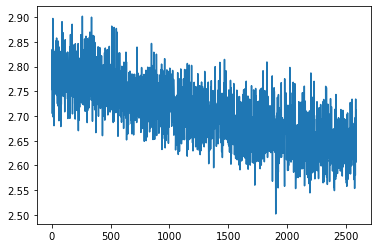

In [64]:
plt.plot(np.arange(len(loss)),loss)

In [ ]:
container.save_model()